# Bigmart Sales Project for beginner

Bigmart Sales Data Set using machine learning for bigenners

Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques. As the name suggests, this data comprises of transaction records of a sales store. This is a regression problem. The data has 8523 rows of 12 variables.

In [3]:
# We will be exploring below models:

#  --> LinearRegression

# Importing some important Libraries & Load the Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter("ignore")

In [6]:
sale_of_mart = pd.read_csv("Big mart sales Prediction .csv")


# Exploratory Data Analysis & Data Preprocessing!

In [8]:
sale_of_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
sale_of_mart.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [10]:
print(" number of rows and columns in Dataset:",sale_of_mart.shape)

 number of rows and columns in Dataset: (8523, 12)


In [11]:
print("number of duplicate values in the Dataset:",sale_of_mart.duplicated().sum())

number of duplicate values in the Dataset: 0


In [12]:
sale_of_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
sale_of_mart.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


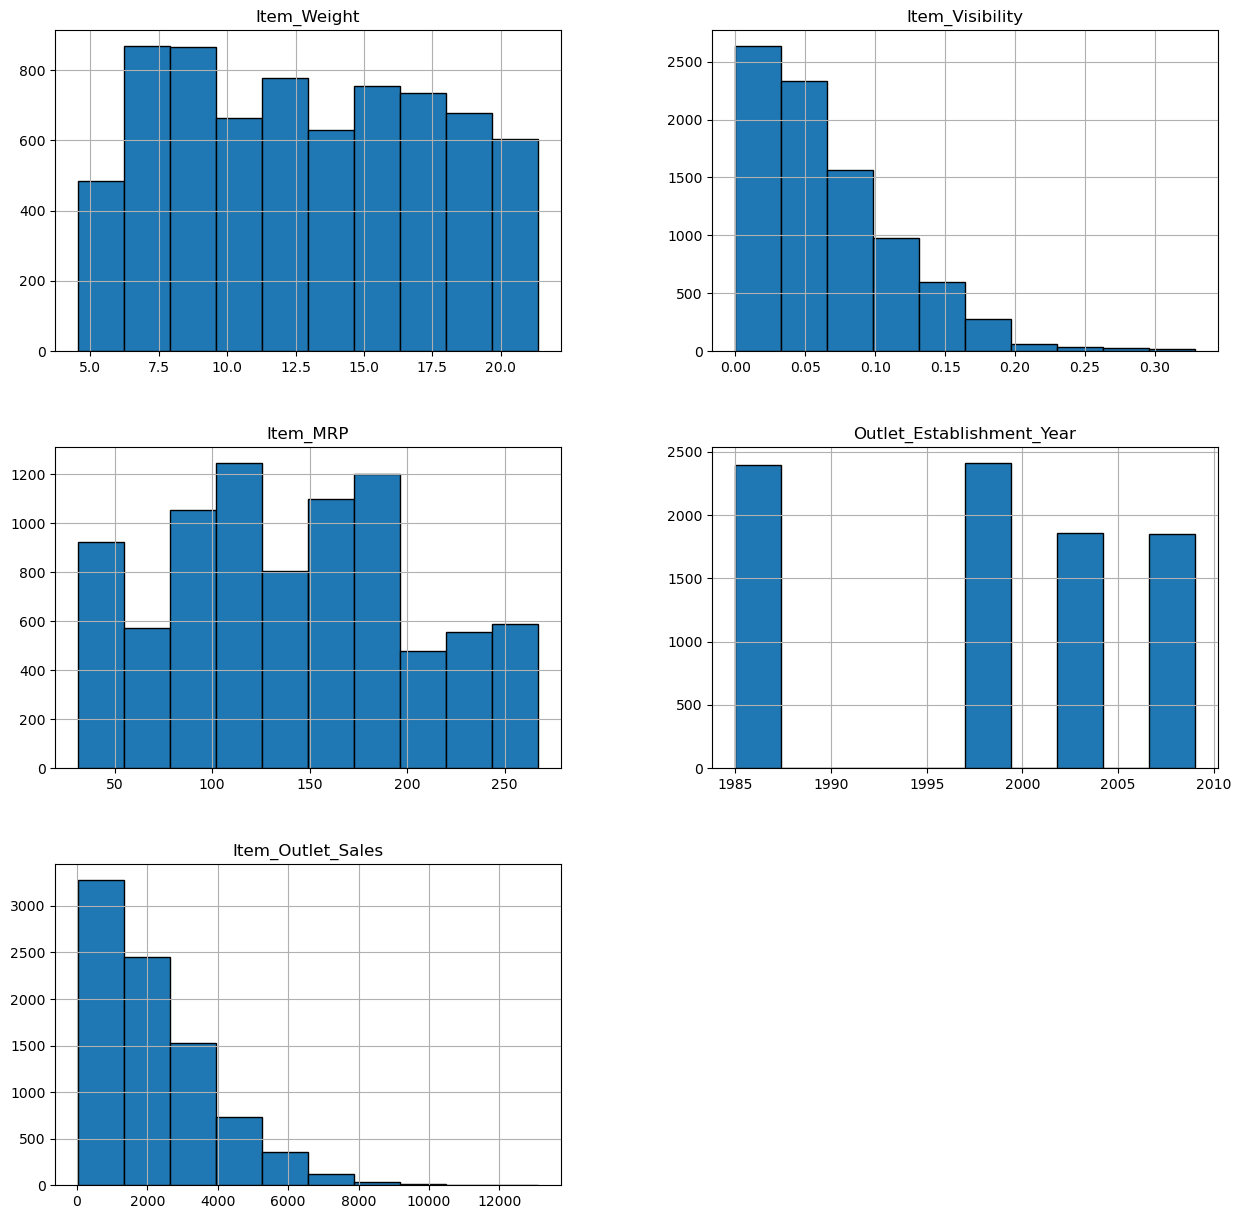

In [14]:
sale_of_mart.hist(figsize=(15,15),edgecolor='black');

# Numerical column

In [17]:
numerical_col = sale_of_mart.select_dtypes(include=["float64","int64"]).columns.tolist()
print("numerical columns is :\n")
numerical_col

numerical columns is :



['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

<Figure size 600x400 with 0 Axes>

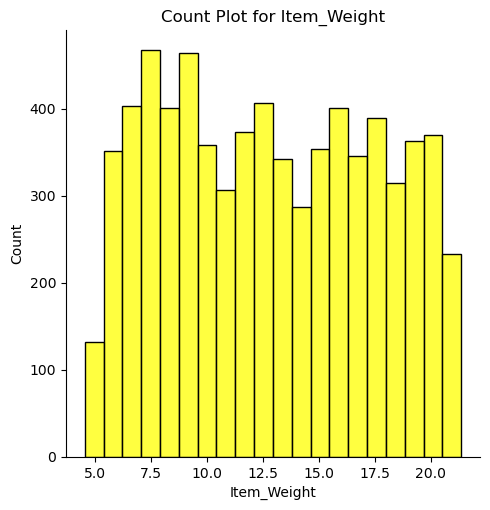

<Figure size 600x400 with 0 Axes>

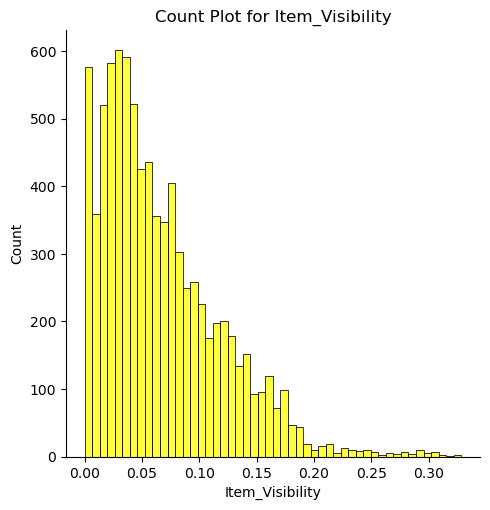

<Figure size 600x400 with 0 Axes>

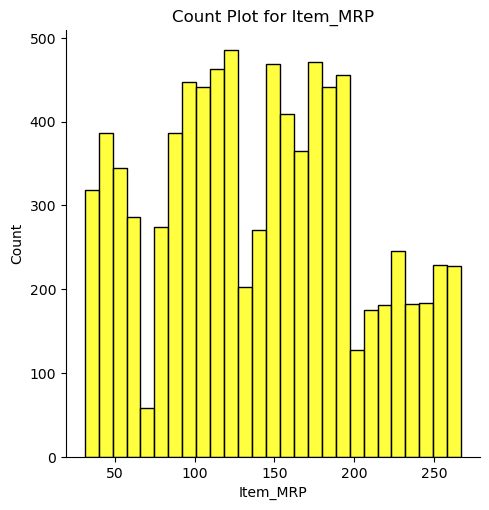

<Figure size 600x400 with 0 Axes>

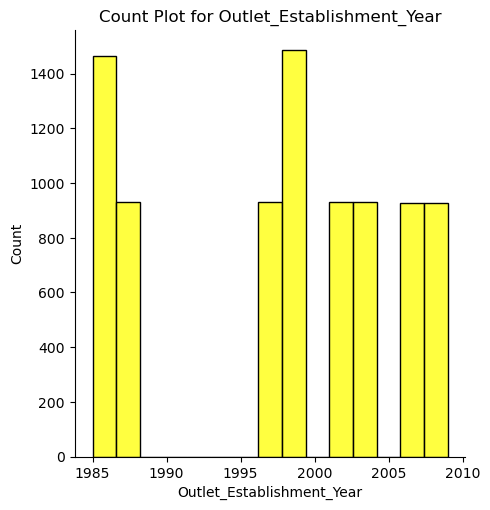

<Figure size 600x400 with 0 Axes>

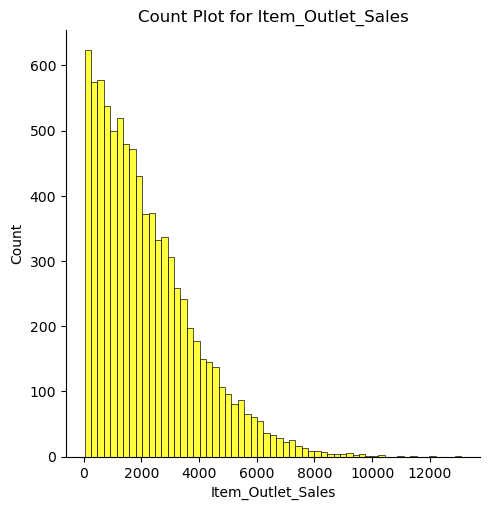

In [18]:

for column in numerical_col[:]:  
    plt.figure(figsize=(6,4))
    sns.displot(data=sale_of_mart, x=column, color="yellow")
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

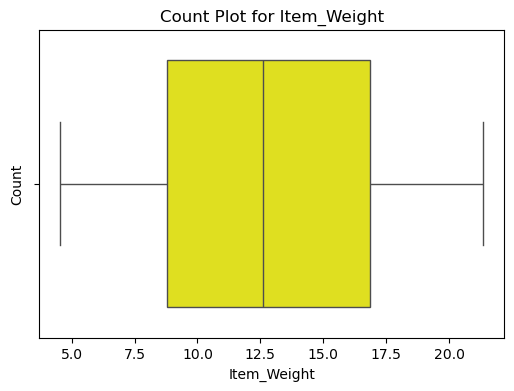

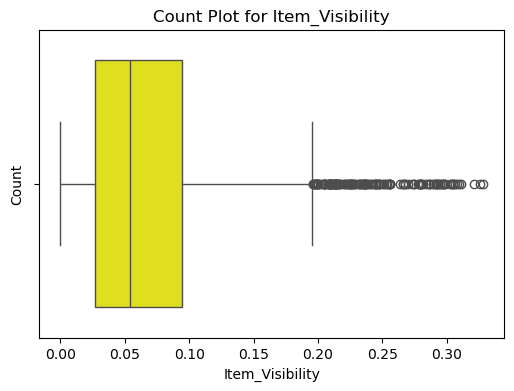

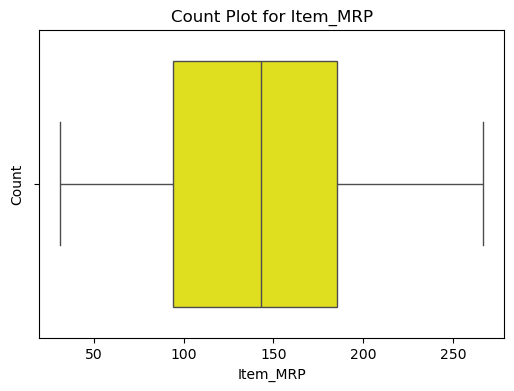

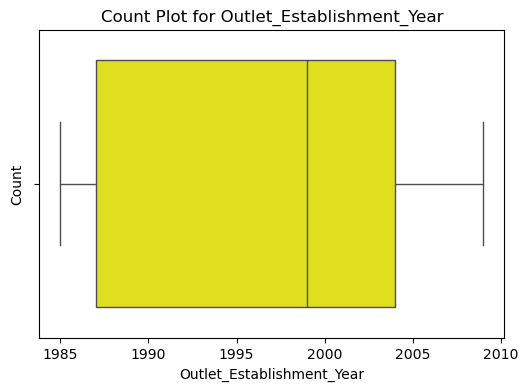

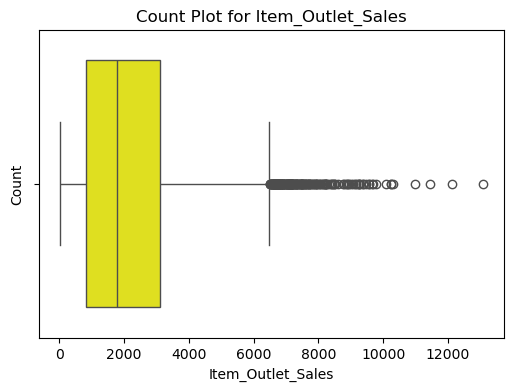

In [19]:

for column in numerical_col[:]:  
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=sale_of_mart, x=column, color="yellow")
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

<Axes: >

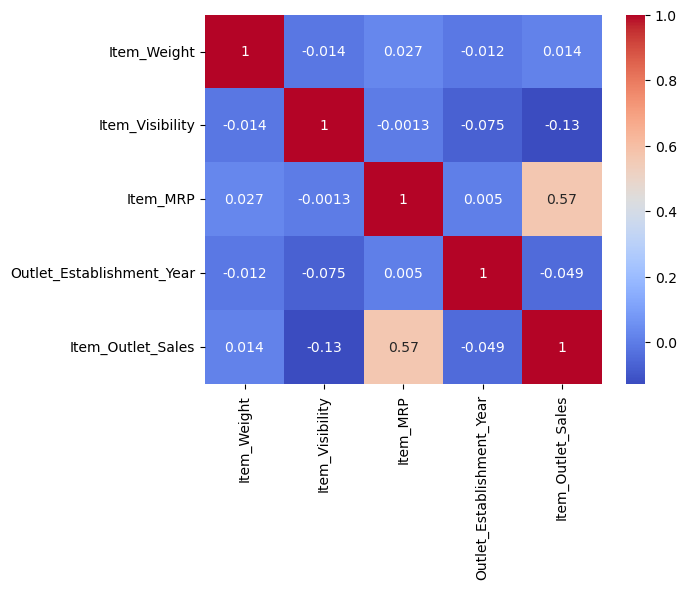

In [20]:
sns.heatmap(sale_of_mart[numerical_col].corr(),cmap='coolwarm',annot=True)


# catagerical columns

In [22]:
categarical_col = sale_of_mart.select_dtypes(include=["object"]).columns.tolist()
print("categarical columns is :\n")
categarical_col

categarical columns is :



['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

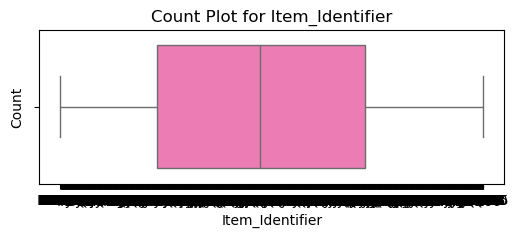

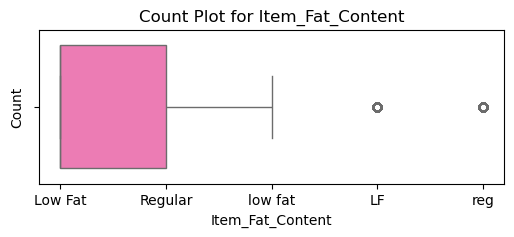

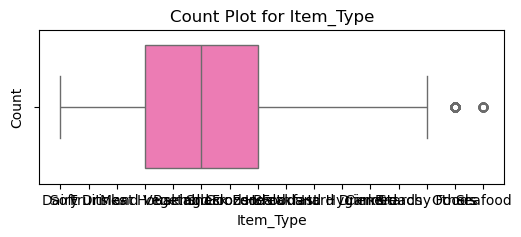

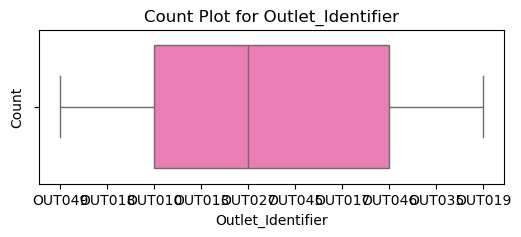

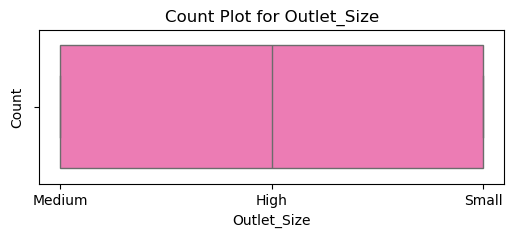

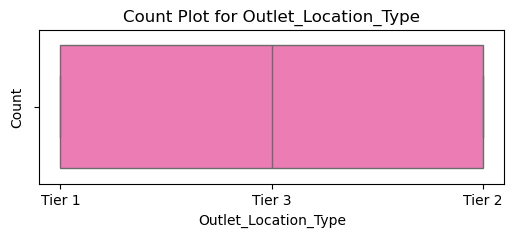

In [23]:

for column in categarical_col[:-1]:  
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=sale_of_mart, x=column, color="hotpink")
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

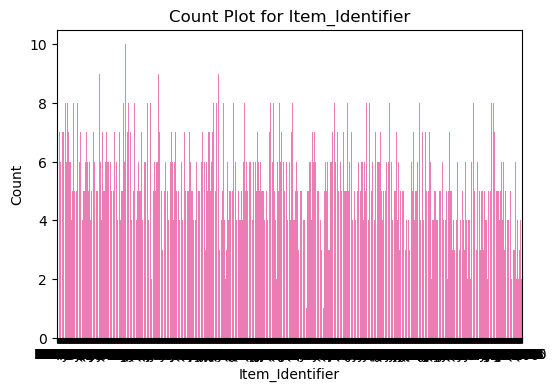

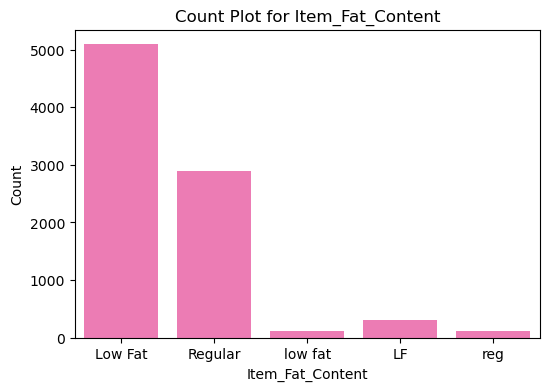

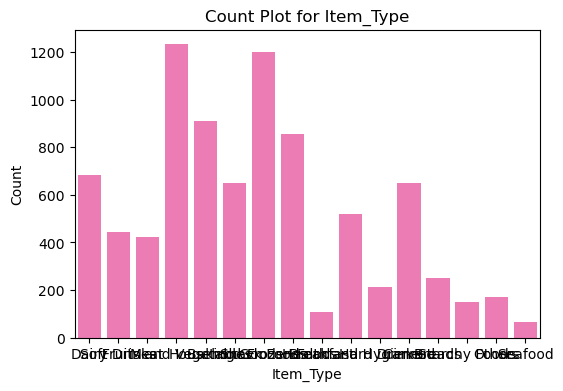

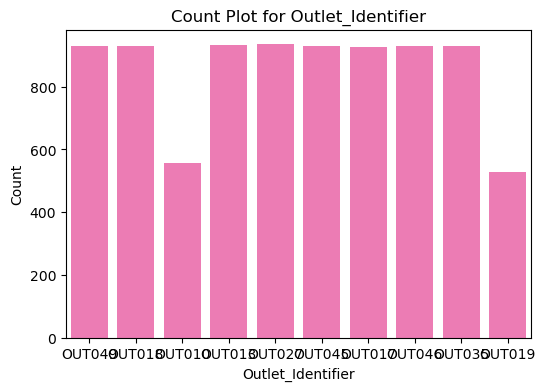

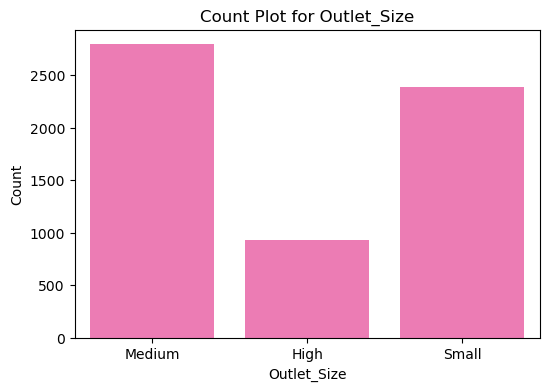

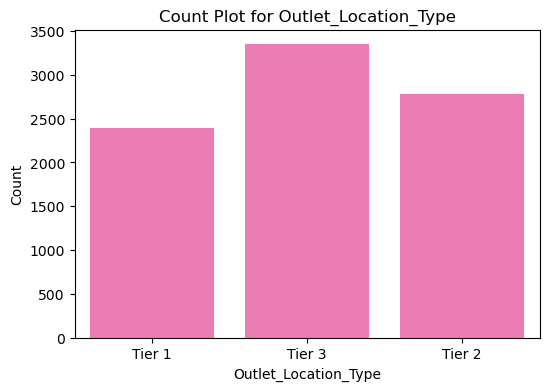

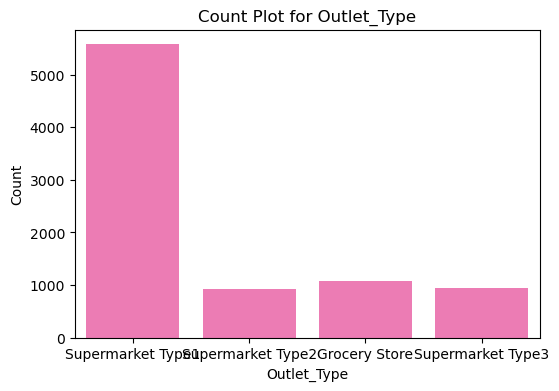

In [24]:

for column in categarical_col[:]:  
    plt.figure(figsize=(6, 4))
    sns.countplot(data=sale_of_mart, x=column, color="hotpink" )
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


In [25]:
# sns.heatmap(sale_of_mart.corr() , annot= True)
sale_of_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
sale_of_mart.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
sale_of_mart.isna().sum()/len(sale_of_mart)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# so we had : 17% of Item_Weight + 28 % of Outlet_Size missing value

# A) Item_Weight missing value 
# B) Outlet_Size missing value

In [30]:
sale_of_mart.Item_Weight =sale_of_mart.Item_Weight.fillna(sale_of_mart.Item_Weight.mean())

In [31]:
sale_of_mart.Item_Weight.describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [32]:
sale_of_mart.Outlet_Size= sale_of_mart.Outlet_Size.fillna(sale_of_mart.Outlet_Size.dropna().mode()[0])

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64


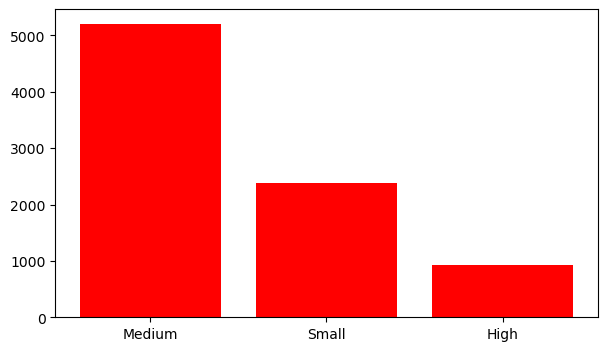

In [33]:
outlet_size_count  =sale_of_mart.Outlet_Size.value_counts()
print(outlet_size_count)

plt.figure(figsize=(7,4))
plt.bar(outlet_size_count.index , outlet_size_count ,color ="red")
plt.show()

In [34]:
sale_of_mart.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


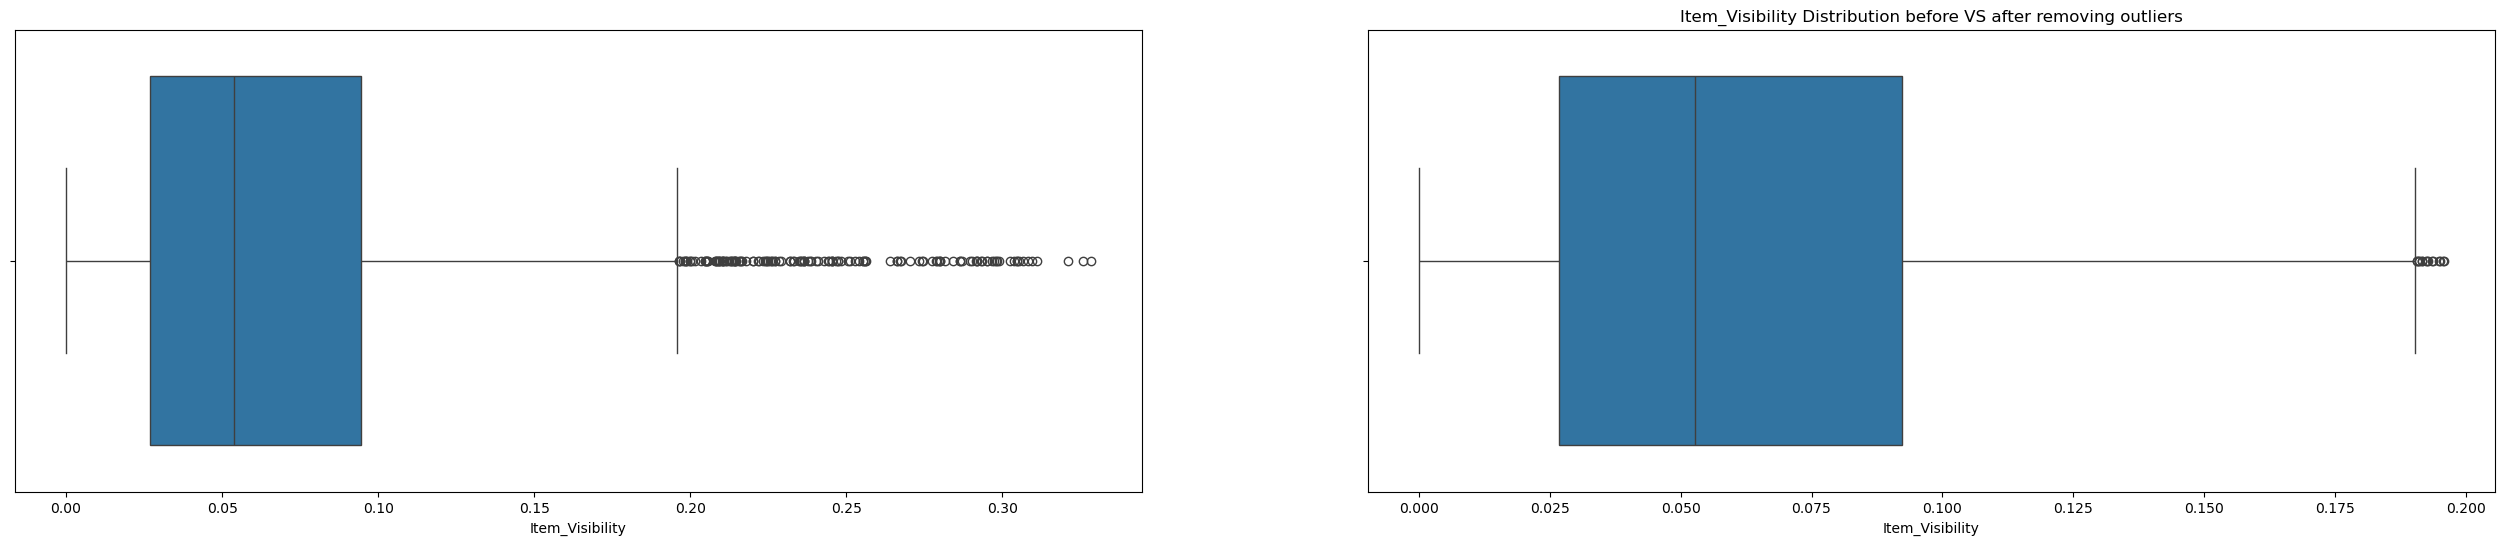

In [35]:
# function to detect outliers using the IQR method

def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(sale_of_mart, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=sale_of_mart['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
sale_of_mart = sale_of_mart[(sale_of_mart['Item_Visibility'] > lower) & (sale_of_mart['Item_Visibility'] < upper)] #train

sns.boxplot(x=sale_of_mart['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()


Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


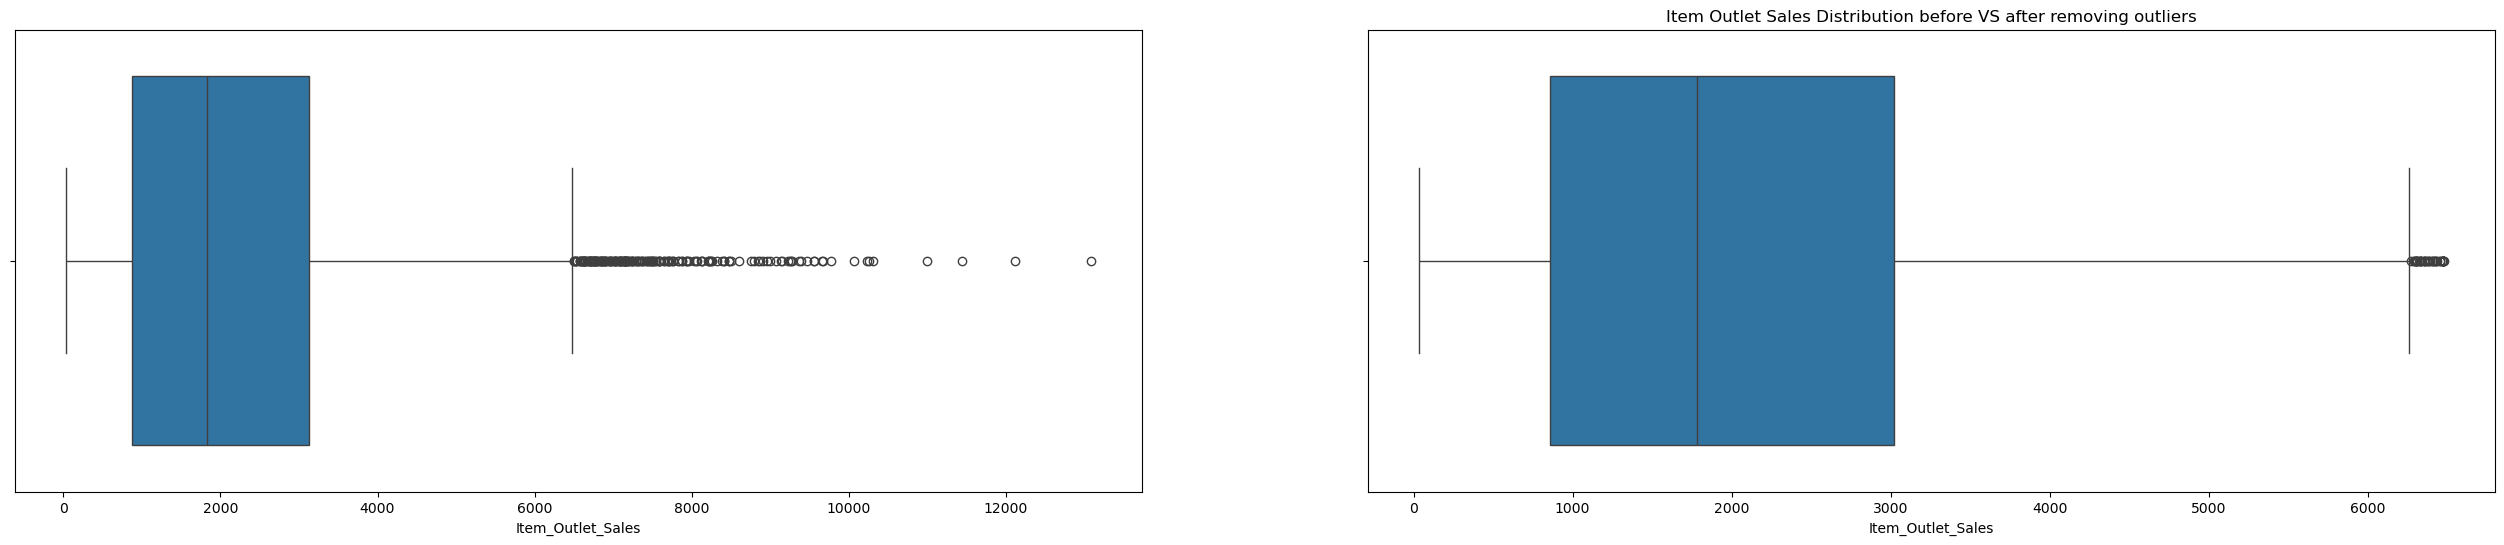

In [36]:
# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(sale_of_mart, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=sale_of_mart['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train = sale_of_mart[(sale_of_mart['Item_Outlet_Sales'] > lower) & (sale_of_mart['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item Outlet Sales Distribution before VS after removing outliers')
plt.show()

# transform data from categorical to numerical

In [38]:
#Label Encoder for Ordinate Data

encoder = LabelEncoder()
ordinal_features = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for feature in ordinal_features:
    sale_of_mart[feature] = encoder.fit_transform(sale_of_mart[feature])
    

sale_of_mart.shape

(8379, 12)

In [39]:
sale_of_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [40]:
sale_of_mart.Item_Fat_Content.value_counts()

Item_Fat_Content
1    5016
2    2831
0     307
4     116
3     109
Name: count, dtype: int64

In [41]:
sale_of_mart.Outlet_Size.value_counts()

Outlet_Size
1    5136
2    2311
0     932
Name: count, dtype: int64

In [42]:
sale_of_mart.Outlet_Location_Type.value_counts()

Outlet_Location_Type
2    3283
1    2785
0    2311
Name: count, dtype: int64

In [43]:
sale_of_mart.Outlet_Type.value_counts()

Outlet_Type
1    5577
0     939
3     935
2     928
Name: count, dtype: int64

In [44]:
sale_of_mart.Item_Type.value_counts()

Item_Type
6     1208
13    1181
9      897
5      845
4      670
3      638
0      631
8      516
14     439
10     418
1      248
7      211
11     167
15     143
2      106
12      61
Name: count, dtype: int64

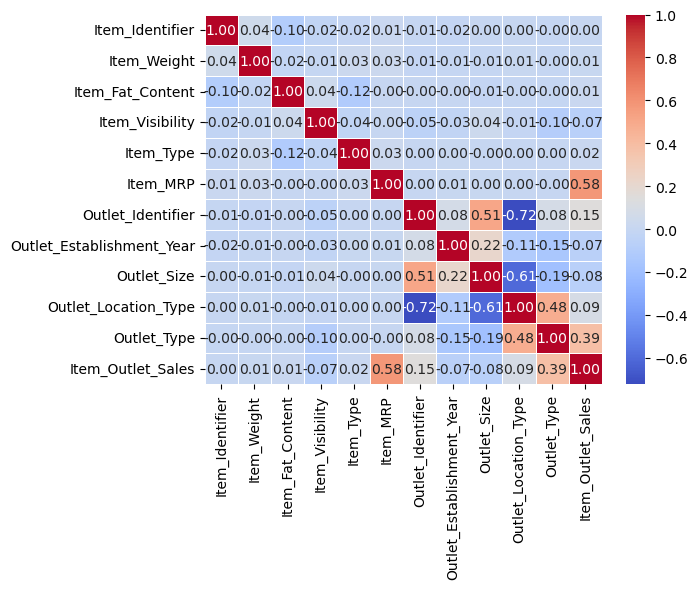

In [84]:
sns.heatmap(sale_of_mart.corr() , annot=True , fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.show()

#  feauturs selection 

In [47]:
x = sale_of_mart.drop(columns="Item_Outlet_Sales")
y = sale_of_mart.Item_Outlet_Sales

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [49]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [50]:
model_prediction= model.predict(xtest)
# model_prediction

model_mse = mean_squared_error(ytest ,model_prediction)
print("mean_squared_error:" , model_mse)

model_R2_score = r2_score(ytest,model_prediction)
print("\nr2_score", model_R2_score)


mean_squared_error: 1382726.1209648259

r2_score 0.5255636174126216


In [51]:
rf_model=RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [54]:
rf_model_prediction=rf_model.predict(xtest)

# print("\nscore in Random forest",rf_model.score(xtrain, ytrain))
r2_score_rf = r2_score(ytest ,rf_model_prediction)
print("\n r2 Score is :",r2_score_rf)


 r2 Score is : 0.5696474743949245


In [60]:
prediction = pd.DataFrame({"LinearRegression":model_prediction , "RandomForestRegressor":rf_model_prediction,"LinearRegression r2_score":model_R2_score,"RandomForestRegressor r2_score":r2_score_rf})

In [62]:
prediction

,LinearRegression,RandomForestRegressor,LinearRegression r2_score,RandomForestRegressor r2_score
0,-627.976482,105.436088,0.525564,0.569647
1,2265.075954,2286.210724,0.525564,0.569647
2,1222.949517,398.201664,0.525564,0.569647
3,2688.623963,3101.509456,0.525564,0.569647
4,1893.343050,2714.732920,0.525564,0.569647
...,...,...,...,...
1671,812.024350,1069.640990,0.525564,0.569647
1672,756.704194,693.543886,0.525564,0.569647
1673,2486.051960,2774.874634,0.525564,0.569647
1674,3158.929145,2791.086864,0.525564,0.569647


# Results

In [76]:
new_data = pd.DataFrame({
    'Item_Identifier': [156.0],
    'Item_Weight': [9.3],
    'Item_Fat_Content': [1.0],
    'Item_Visibility': [0.016047],
    'Item_Type': [4.0],
    'Item_MRP': [249.8092],
    'Outlet_Identifier': [9.0],
    'Outlet_Establishment_Year': [1999.0],
    'Outlet_Size': [1.0],
    'Outlet_Location_Type': [0.0],
    'Outlet_Type': [1.0]
})

# Making predictions
try:
    # Prediction with the first model
    prediction = model.predict(new_data)
    print(f"Predicted Item Outlet Sales (Model): {prediction[0]}")

    # Prediction with the second model (rf_model)
    rf_model_prediction = rf_model.predict(new_data)
    print(f"Predicted Item Outlet Sales (RF Model): {rf_model_prediction[0]}")

except Exception as e:
    print(f"An error occurred during prediction: {e}")

Predicted Item Outlet Sales (Model): 4321.1846726804815
Predicted Item Outlet Sales (RF Model): 4381.703037999998
